In [2]:
%load_ext Cython
import numpy as np
import timeit

# Problem 1
Time taken-  
np.matmul: 2.16 µs ± 73.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)   
matrix_multiply: 750 µs ± 216 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)  

No of multiplications- 1000    
Floating Point Operations- 2000   
This code was tested in google collab.
Estimated FLOPS=
 1: np.matmul- 0.926 GFLOPs
2: matrix_mltiply: 0.0027 GFLOPs

In [6]:
matrix1 = np.random.rand(100, 100)
matrix2 = np.random.rand(100, 100)
print("np.matmul takes- ")
%timeit np.matmul(matrix1, matrix2)

def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res
print("matrix_multiply takes-")
%timeit matrix_multiply(matrix1, matrix2)

np.matmul takes- 
84.8 µs ± 770 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
matrix_multiply takes-
893 ms ± 334 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Problem 2  
This code was tested in google collab. The processor specifications are given below.
Clock Frequency- 2.20  GHz  
2 threads per core.
Estimated FLOPS- Clock frequency = 2.20 GFLOPS
The CPU is Intel Xeon E5-2673 v4. This has Intel's 4th gen Haswell microarchitecture, with a single core available and 2 threads, with AVX2 instrctions, that have SSE registers of 256 byte width. This can execute 256/32 = 8 floating point operations at once. But due to superscalarity, 2 instructions can be execte at once. Also, Haswell architecture supports FMA3 (Fused Multiply Add with 3 operands, of form a\*b+c) instructions. This means the addition and multiplication can both be done in a single instruction. For programs like matrix mulltiplication, which have equal number of consecutive additions and multiiplications, this also doubles the GFLOPs. Hence, the theoretical Max GFLOPs is 2.20\*8(SMID)\*2(superscalarity)\*2(FMA3) = 70.4 GFLOPs.

In [25]:
!lscpu


Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:          6
    Model:               79
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4400.44
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clf
                         lush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_
                         good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fm
                         a cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hyp
                         ervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd i

#Problem 3  
The GFLOPs for numpy array exceed the maximum GFLOPs on the CPU from matrix of size 40 onwards. The GFLOPs also seem to converge for large matrix size towards around 33-35, with dtype as double or 64 bit . This is as numpy code takes advantage of SIMD parallelization. When the matrix has datatype as float32, the max GFLOPs doubles to converge to near 73. This is as twice as many operands can fit into the SSE's of the processor, when using 32 bit floating point insgtead of 64.  
Cache miss could be responsible for sudden drops in GFLOPs for certain runs of the code.


3.66 µs ± 2.4 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
3.5 µs ± 1.32 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
6.62 µs ± 1.47 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
The slowest run took 14.08 times longer than the fastest. This could mean that an intermediate result is being cached.
169 µs ± 194 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
165 µs ± 36.9 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
990 µs ± 30.2 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
7.78 ms ± 231 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
60.4 ms ± 794 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
[0.5459459121419206, 4.568817803128281, 19.326491963235668, 6.057740202344071, 49.59887598497052, 66.17898398169339, 67.41032412127153, 69.40904514411358]
5.24 µs ± 2.25 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
6.82 µs ± 1.6 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
15.8 µs ± 1.96 µs per loo

Text(0.5, 1.0, 'GFLOPs vs Matrix size')

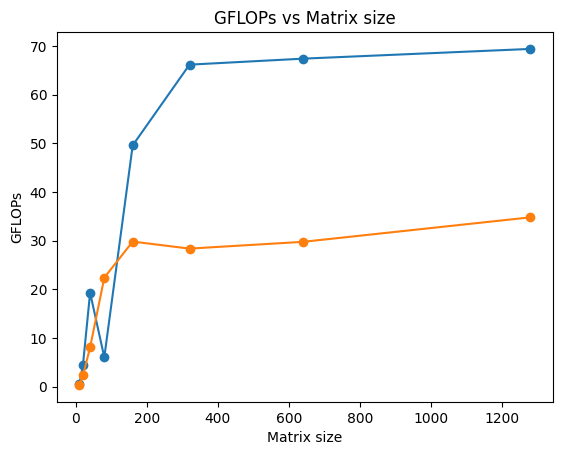

In [35]:
import matplotlib.pyplot as plt

# Using float32
a=[]
N=8 # Number of iterations
for i in range(N):
  matrix1 = np.float32(np.random.rand(10*2**i, 10*2**i))
  matrix2 = np.float32(np.random.rand(10*2**i, 10*2**i))
  b=%timeit -o -r 3 -n 10 np.matmul(matrix1, matrix2)
  a.append(2*1000*2**(3*i)/(10**9*np.mean(np.array(b.timings))))
print(a)
plt.plot([10*2**i for i in range(N)],a, marker='o')
plt.xlabel("Matrix size")
plt.ylabel("GFLOPs")
plt.title("GFLOPs vs Matrix size")

# using double
a=[]
N=8 # Number of iterations
for i in range(N):
  matrix1 = np.double(np.random.rand(10*2**i, 10*2**i))
  matrix2 = np.double(np.random.rand(10*2**i, 10*2**i))
  b=%timeit -o -r 3 -n 10 np.matmul(matrix1, matrix2)
  a.append(2*1000*2**(3*i)/(10**9*np.mean(np.array(b.timings))))
  #%timeit -r 1 -n 1 matrix_multiply(matrix1, matrix2)
print(a)
plt.plot([10*2**i for i in range(N)],a, marker='o')
plt.xlabel("Matrix size")
plt.ylabel("GFLOPs")
plt.title("GFLOPs vs Matrix size")

#Problem 4  
FLOPs- 0.003 GFLOPs  on the google collab server, a small improvement over the code using pure python. This small improvement is due to C being compiled vs python being interpretted.


In [ ]:
%%cython -a
import numpy as np
import cython
matrix1 = np.random.rand(50, 50)
matrix2 = np.random.rand(50, 50)

def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [42]:

%timeit -r 10 matrix_multiply(matrix1, matrix2)

68.6 ms ± 865 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


#Problem 5  


Step i) Declaring the data types for index variables- 0.003 GFLOPs, no significant improvement in code due to this.

In [ ]:
%%cython -a

import numpy as np
import cython

def cy_matmu(u, v,res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    # res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

Step ii) Adding the decorator functions- 0.003 GFLOPs, produces limited improvements

In [ ]:
%%cython -a

import numpy as np
import cython

@cython.boundscheck(False)
@cython.wraparound(False)
def cy_matmu(u, v,res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    # res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [79]:
u = np.random.random((50,50))
v = np.random.random((50,50))
res = np.zeros((50, 50))
%timeit -n 10 -r 100 cy_matmu(u, v, res)

83.1 ms ± 24.5 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


Step iii) Setting the type of input and output arrays gives the biggest improvement in code performance. The speed is- 1.71 GFLOPs, this is close to 2.2, the CPU clock frequency.

In [43]:
%%cython -a

import numpy as np
import cython

@cython.boundscheck(False)
@cython.wraparound(False)
def cy_matmu(float[:,:] u, float[:,:] v, float[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [48]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
res = np.float32(np.zeros((50, 50)))
%timeit -n 10 -r 100 cy_matmu(u, v, res)

ValueError: ignored

Step iv) Using double instead of float- It produces no significant difference in run time. This is as the cython code is not vectorized.

In [45]:
%%cython -a

import numpy as np
cimport cython
cimport numpy as cnp

@cython.boundscheck(False)
@cython.wraparound(False)
def cy_matmu(double[:,:] u, double[:,:] v, double[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

Content of stderr:
In file included from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1948,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_812b57186ae056bd8a818dcfc3508734f4c90cd3.c:1208:
/usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~

In [47]:
u = np.double(np.random.random((50,50)))
v = np.double(np.random.random((50,50)))
res = np.double(np.zeros((50, 50)))
%timeit -n 10 -r 100 cy_matmu(u, v, res)

213 µs ± 40.8 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
